# Project: Energy efficiency of buildings

Link to the dataset: https://archive.ics.uci.edu/ml/datasets/Energy+efficiency#

### Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

### Data Set Information:

Energy analysis was performed using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness

X2 Surface Area - m²

X3 Wall Area - m²

X4 Roof Area - m²

X5 Overall Height - m

X6 Orientation - 2:North, 3:East, 4:South, 5:West

X7 Glazing Area - 0%, 10%, 25%, 40% (of floor area)

X8 Glazing Area Distribution (Variance) - 1:Uniform, 2:North, 3:East, 4:South, 5:West

y1 Heating Load - kWh/m²

y2 Cooling Load - kWh/m²

### Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012

### Citation Request:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012 (the paper can be accessed from [Web Link])

For further details on the data analysis methodology:
A. Tsanas, 'Accurate telemonitoring of Parkinsonâ€™s disease symptom severity using nonlinear speech signal processing and statistical machine learning', D.Phil. thesis, University of Oxford, 2012 (which can be accessed from [Web Link])

<h4>Steps:</h4>
<ol>
  <li>Data Analysis</li>
  <li>Feature Engineering</li>
  <li>Feature Selection</li>
  <li>Model Training</li>
  <li>Obtaining Predictions / Scoring</li>
</ol>

<b>Dependencies and versions</b>

In [1]:
# importing libraries
from platform import python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)

Python version: 3.8.8
NumPy version: 1.20.2
Pandas version: 1.2.4
SciPy version: 1.6.2


<h2>STEP 1: Data analysis</h2>

In [3]:
# importing the dataset
df = pd.read_excel("ENB2012_data.xlsx")

In [4]:
# shape
df.shape

(768, 12)

In [5]:
# showing first five rows of the training dateset
pd.pandas.set_option('display.max_columns', None, 'display.max_rows', None, )
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN,NaN


In [6]:
# showing data types
df.dtypes

X1             float64
X2             float64
X3             float64
X4             float64
X5             float64
X6               int64
X7             float64
X8               int64
Y1             float64
Y2             float64
Unnamed: 10    float64
Unnamed: 11    float64
dtype: object

<b>Target</b>

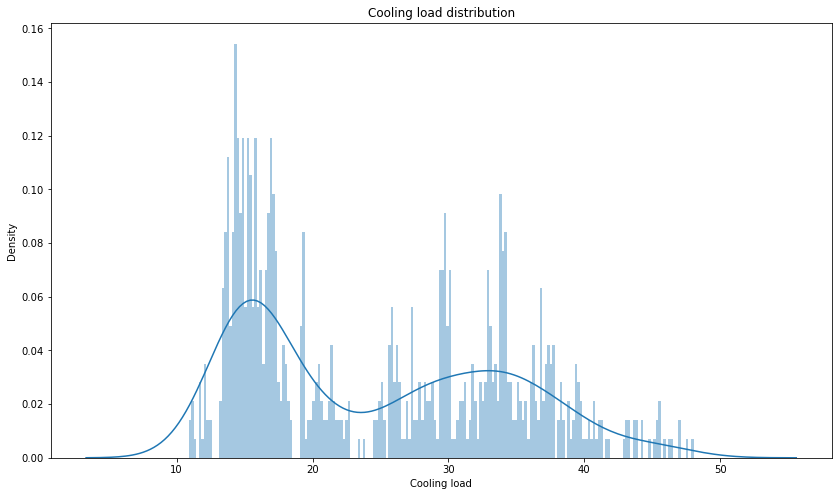

In [7]:
# plotting distribution of the target
plt.figure(figsize=(14,8))

ax = sns.distplot(df['Y2'],bins=200)

plt.title('Cooling load distribution')
plt.xlabel('Cooling load')

plt.show()

<b>Missing values</b>

In [8]:
# checking duplicated rows
df.duplicated().sum()

0

In [9]:
# checking missing values
df.isnull().any(axis = 1).sum()

768

In [10]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Unnamed: 10    1.0
Unnamed: 11    1.0
dtype: float64

Variables 'Unnamed: 10' and 'Unnamed: 11' totally consist of missing values.

In [11]:
df = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']]

<b>Numerical variables</b>

In [12]:
# all of the dependent variables are the numerical variables
num_vars = [var for var in df.columns if var not in ('Y1', 'Y2')]
len(num_vars)

8

In [13]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique()) < 20]
print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  8


In [14]:
# visualising the discrete variables
df[discrete_vars].head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


 Analysing their contribution to the cooling load

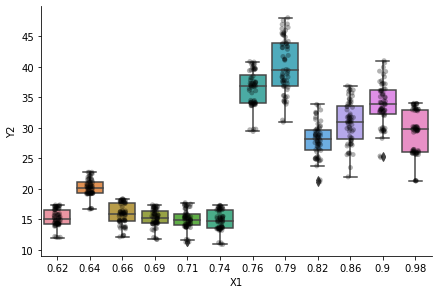

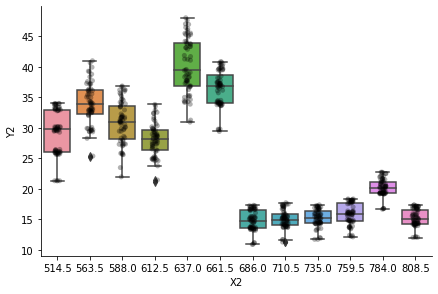

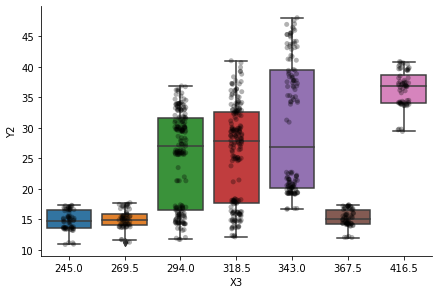

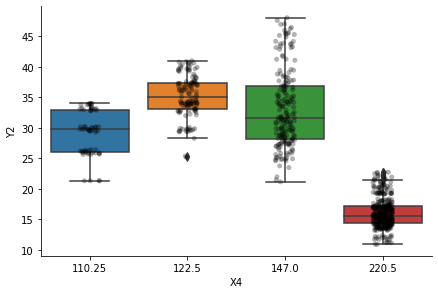

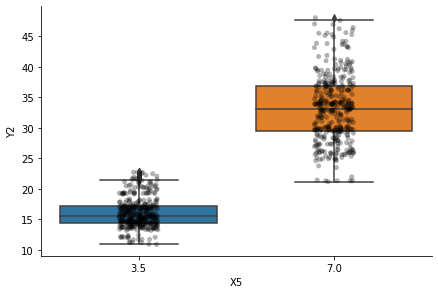

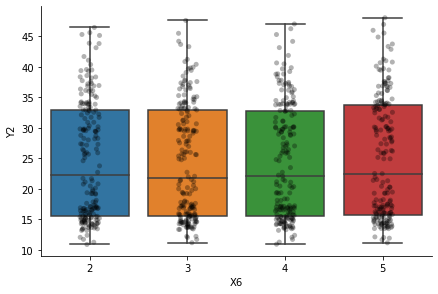

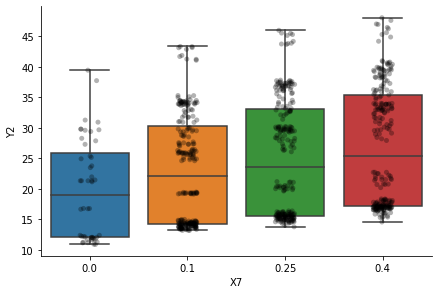

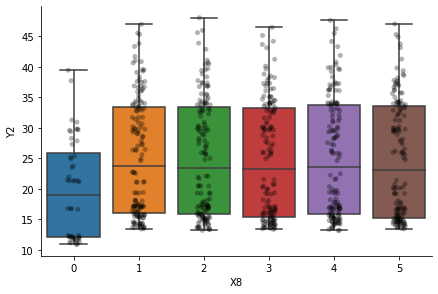

In [15]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='Y2', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='Y2', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

All variables but X6 seems to be predictive